In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
from orbitize import results, plot
from orbitize.basis import tau_to_tp
from astropy import units as u
from astropy.time import Time
from scipy.stats import norm

"""
using `orbitize_for_morgan` branch of orbitize
"""

# 1A
planet = True
run_name = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_burn100_total25000000"

# 1B
# planet = False
# run_name = "planetFalse_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_burn100_total25000000"

# 1C
# planet = True
# ecc = True
# run_name = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_eccfree_burn100_total25000000"

# 1D
# planet = True
# ecc = False
# jit = True
# run_name = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_fitastromjitter_burn100_total25000000"

# 2A
# planet = True
# run_name = "planetTrue_dvdFalse_renormHIPFalse_fitradioFalse_fithipparcosTrue_burn100_total25000000"

# 2B
# planet = False
# run_name = "planetFalse_dvdFalse_renormHIPFalse_fitradioFalse_fithipparcosTrue_burn100_total25000000"

# 3A
# planet = True
# ecc = False
# run_name = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosFalse_burn100_total25000000"

# 3B
# planet = False
# run_name = "planetFalse_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosFalse_burn100_total25000000"

# 5A
# planet = True
# run_name = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_nofirstIAD_burn100_total25000000"

# 5B
# planet = False
# run_name = "planetFalse_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_nofirstIAD_burn100_total25000000"

# Harper reproduction
# planet = False
# run_name = "planetFalse_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosFalse_errornorm_burn100_total5000000"

beetle_results = results.Results()
beetle_results.load_results("results/{}.hdf5".format(run_name))

# create new dir for plots about this run
savedir = "plots/{}".format(run_name)
if not os.path.exists(savedir):
    os.mkdir(savedir)

# Morgan's aesthetic
plt.rcParams["font.family"] = "stixgeneral"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 11
plt.rcParams["figure.facecolor"] = "white"

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_143090/765253512.py:20: SyntaxWarning: invalid escape sequence '\p'
  axes[0].set_xlabel("$\pi$ [mas]")
/tmp/ipykernel_143090/765253512.py:32: SyntaxWarning: invalid escape sequence '\m'
  axes[1].set_xlabel("$\mu_{{\\alpha_0}}$ [mas/yr]")
/tmp/ipykernel_143090/765253512.py:40: SyntaxWarning: invalid escape sequence '\m'
  axes[2].set_xlabel("$\mu_{{\\delta_0}}$ [mas/yr]")
/tmp/ipykernel_143090/765253512.py:56: SyntaxWarning: invalid escape sequence '\D'
  axes[4].set_xlabel("$\Delta\delta_0$ [mas]")


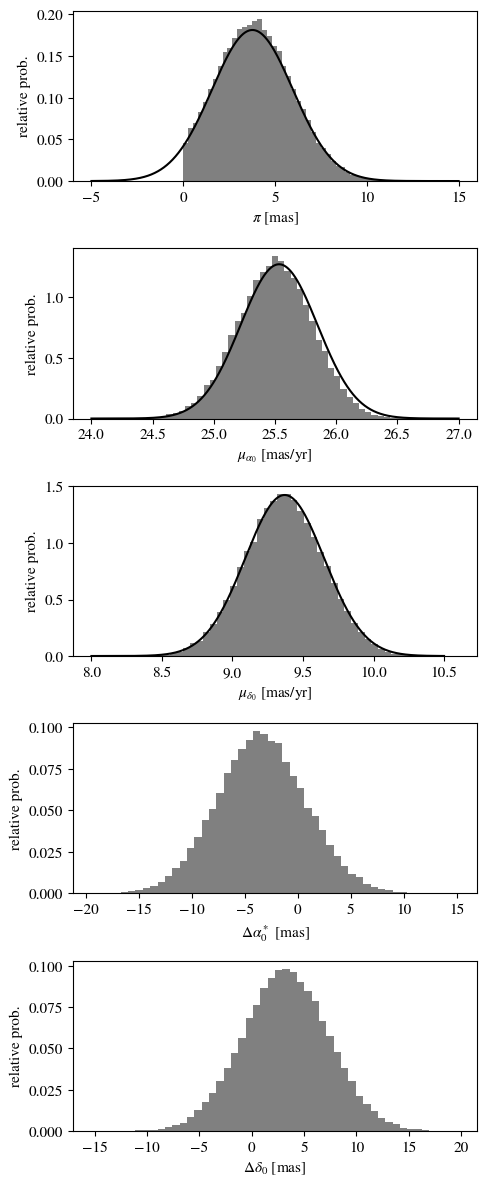

In [16]:
# make Harper reproduction plot
param_idx = beetle_results.system.param_idx
fig, axes = plt.subplots(5, figsize=(5, 12))

# plx
xs = np.linspace(
    -5,
    15,
    1000,
)
axes[0].hist(
    beetle_results.post[:, param_idx["plx"]],
    bins=50,
    density=True,
    color="grey",
)

# Harper+ 17 table 3, 2.40 mas values
axes[0].plot(xs, norm(3.77, 2.20).pdf(xs), color="k")
axes[0].set_xlabel("$\pi$ [mas]")

# PM RA
xs = np.linspace(24, 27, 1000)
axes[1].hist(
    beetle_results.post[:, param_idx["pm_ra"]]
    / np.cos(np.radians(beetle_results.system.hipparcos_IAD.delta0)),
    bins=50,
    density=True,
    color="grey",
)
axes[1].plot(xs, norm(25.533, 0.314).pdf(xs), color="k")
axes[1].set_xlabel("$\mu_{{\\alpha_0}}$ [mas/yr]")

# PM Dec
xs = np.linspace(8, 10.5, 1000)
axes[2].hist(
    beetle_results.post[:, param_idx["pm_dec"]], bins=50, density=True, color="grey"
)
axes[2].plot(xs, norm(9.37, 0.28).pdf(xs), color="k")
axes[2].set_xlabel("$\mu_{{\\delta_0}}$ [mas/yr]")

# RA offset
axes[3].hist(
    beetle_results.post[:, param_idx["alpha0"]], bins=50, density=True, color="grey"
)
xs = np.linspace(-20, 15, 1000)
# axes[3].plot(xs, norm(13.557, 4.282).pdf(xs), color="k")
axes[3].set_xlabel("$\\Delta\\alpha_0^*$ [mas]")

# Dec offset
axes[4].hist(
    beetle_results.post[:, param_idx["delta0"]], bins=50, density=True, color="grey"
)
xs = np.linspace(-15, 20, 1000)
# axes[4].plot(xs, norm(4.70, 4.06).pdf(xs), color="k")
axes[4].set_xlabel("$\Delta\delta_0$ [mas]")

for a in axes:
    a.set_ylabel("relative prob.")

plt.tight_layout()
plt.savefig(f"{savedir}/harper_compare.png", dpi=250)

In [26]:
param = "inc1"
param_post = beetle_results.post[:, beetle_results.param_idx[param]]
param_post = np.degrees(param_post)
# param_post = param_post[param_post < 5] * 365.25
quants = np.quantile(param_post, [0.16, 0.5, 0.84])
print(f"{quants[1]}, +{quants[2]- quants[1]} - {quants[1]- quants[0]}")

q_post = (
    beetle_results.post[:, beetle_results.system.param_idx["m1"]]
    / beetle_results.post[:, beetle_results.system.param_idx["m0"]]
)
q_quants = np.quantile(q_post, [0.16, 0.5, 0.84])
print(f"{q_quants[1]}, +{q_quants[2]- q_quants[1]} - {q_quants[1]- q_quants[0]}")

msini_post = beetle_results.post[:, beetle_results.system.param_idx["m1"]] * np.sin(
    beetle_results.post[:, beetle_results.system.param_idx["inc1"]]
)
msini_quants = np.quantile(msini_post, [0.16, 0.5, 0.84])
print(
    f"{msini_quants[1]}, +{msini_quants[2]- msini_quants[1]} - {msini_quants[1]- msini_quants[0]}"
)

98.44382330306479, +5.108237543580813 - 4.999935806186741
0.11980620012737014, +0.024147119263673827 - 0.01873889063286456
2.1295392858288684, +0.4525283008484582 - 0.45653133670847734


Make corner plot, secondary mass plot, and period plot:

{'per1': 0, 'ecc1': 1, 'inc1': 2, 'aop1': 3, 'pan1': 4, 'tau1': 5, 'plx': 6, 'pm_ra': 7, 'pm_dec': 8, 'alpha0': 9, 'delta0': 10, 'm1': 11, 'm0': 12}


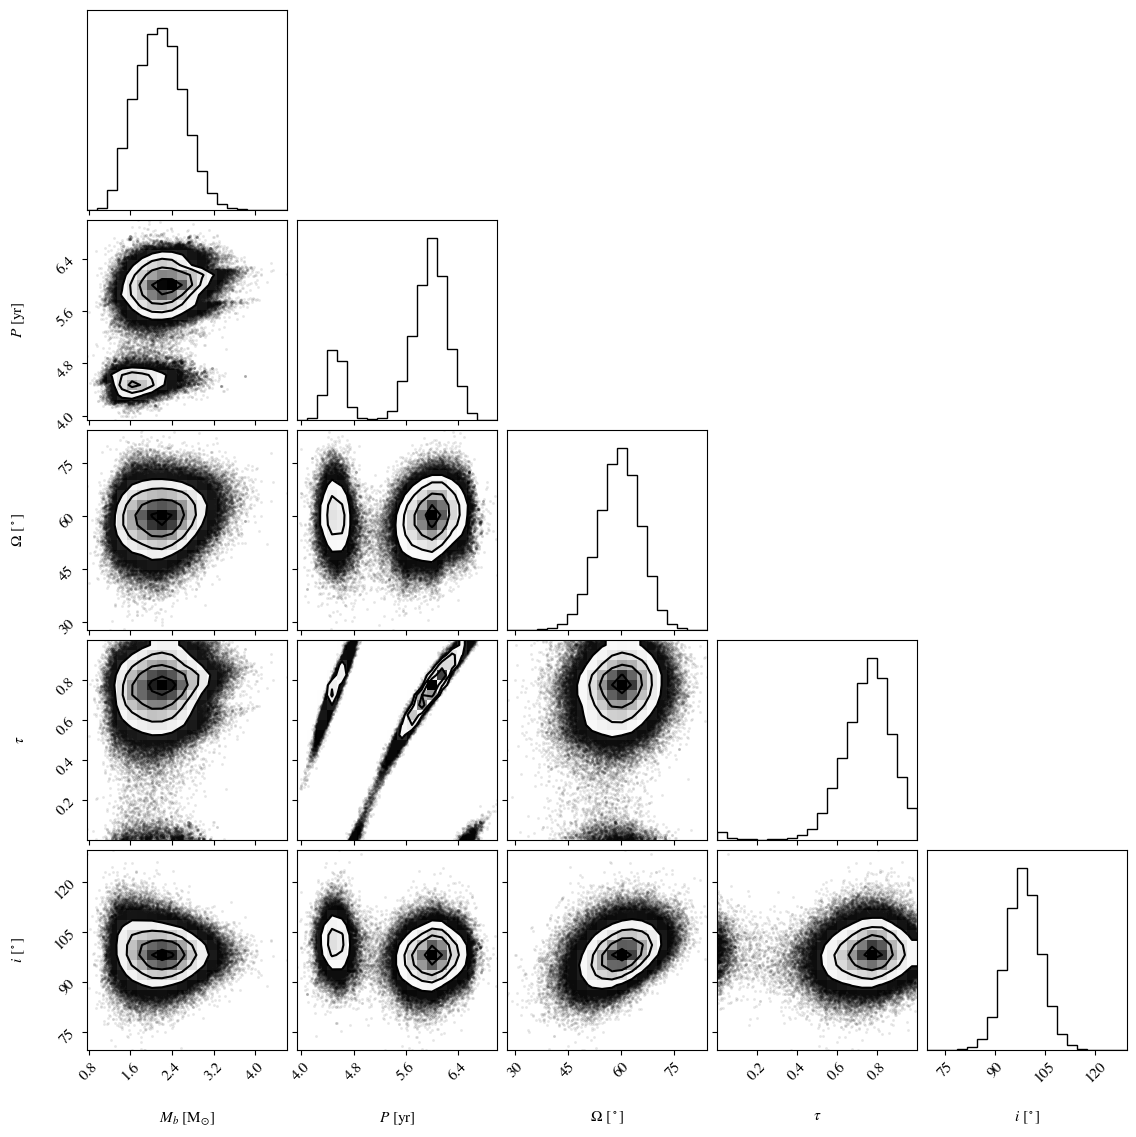

In [3]:
minimal_corner = True

if not planet:
    param_list = ["plx", "pm_ra", "pm_dec", "alpha0", "delta0"]
else:
    param_list = [
        "plx",
        "pm_ra",
        "pm_dec",
        "alpha0",
        "delta0",
        "m0",
        "m1",
        "per1",
        "pan1",
        "tau1",
        "inc1",
    ]
# if ecc:
#     param_list.append("ecc1")
# if jit:
#     param_list.append("sigma_ast")
if minimal_corner:
    param_list = [
        "m1",
        "per1",
        "pan1",
        "tau1",
        "inc1",
    ]


print(beetle_results.param_idx)
fig = plot.plot_corner(beetle_results, param_list=param_list)

if minimal_corner:
    plt.savefig("{}/minimal_corner.pdf".format(savedir), dpi=250)
else:
    plt.savefig("{}/corner.pdf".format(savedir), dpi=250)

5.66034360548226
hi:0.7278006618403436
lo:0.6765974617072441
2022.8981615966209
hi:0.8439606534723225
lo:0.822527015158812


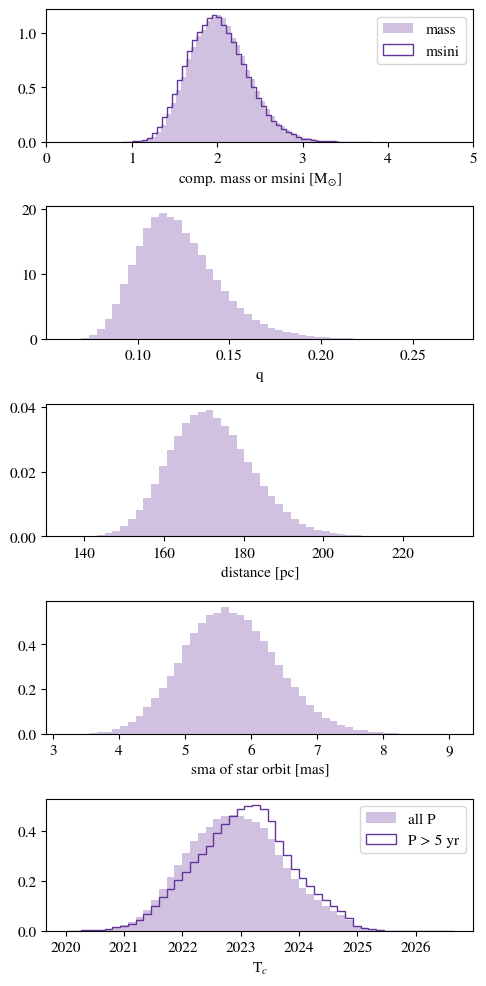

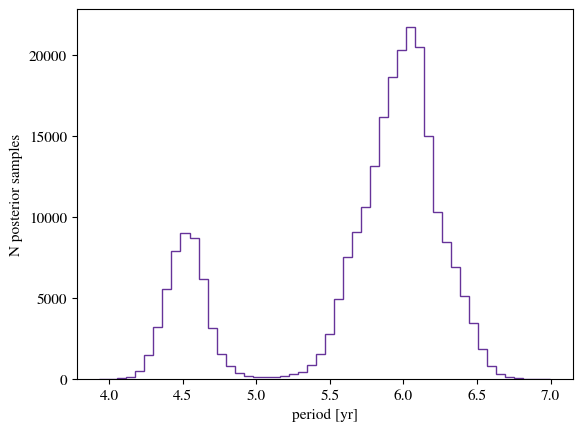

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(5, 10))

m0_mask = (beetle_results.post[:, beetle_results.param_idx["m0"]] > 12) & (
    beetle_results.post[:, beetle_results.param_idx["m0"]] < 20
)
per_mask = beetle_results.post[:, beetle_results.param_idx["per1"]] > 5

mtot = (
    beetle_results.post[:, beetle_results.param_idx["m1"]]
    + beetle_results.post[:, beetle_results.param_idx["m0"]]
)
plx_as = beetle_results.post[:, beetle_results.param_idx["plx"]] * 1e-3
m1_msol = beetle_results.post[:, beetle_results.param_idx["m1"]]


m0 = beetle_results.post[:, beetle_results.param_idx["m0"]]
sma_au = (beetle_results.post[:, beetle_results.param_idx["per1"]] ** 2 * mtot) ** (
    1 / 3
)


ax[0].hist(
    m1_msol[m0_mask],
    bins=50,
    density=True,
    color="rebeccapurple",
    alpha=0.3,
    label="mass",
)
ax[0].hist(
    m1_msol[m0_mask]
    * np.sin(beetle_results.post[:, beetle_results.param_idx["inc1"]][m0_mask]),
    bins=50,
    density=True,
    color="rebeccapurple",
    histtype="step",
    label="msini",
)
ax[0].legend()
ax[0].set_xlim(0, 5)
ax[0].set_xlabel("comp. mass or msini [M$_{{\\odot}}$]")

ax[1].hist(
    beetle_results.post[:, beetle_results.param_idx["m1"]]
    / beetle_results.post[:, beetle_results.param_idx["m0"]],
    bins=50,
    density=True,
    color="rebeccapurple",
    alpha=0.3,
)
ax[1].set_xlabel("q")


# ax[2].hist(
#     sma_au[m0_mask],  # * cst.au / cst.R_sun,
#     bins=50,
#     density=True,
#     label="all P",
#     color="rebeccapurple",
#     alpha=0.3,
# )
# ax[2].hist(
#     sma_au[m0_mask & per_mask],  # * (cst.au / cst.R_sun).to(""),
#     bins=50,
#     density=True,
#     color="rebeccapurple",
#     histtype="step",
#     label="P > 5 yr",
# )
# ax[2].legend()
# ax[2].set_xlabel("sma [au]")

ax[2].hist(1 / plx_as, bins=50, density=True, color="rebeccapurple", alpha=0.3)
ax[2].set_xlabel("distance [pc]")

dist_pc = 1 / plx_as

sma_star_mas = (
    (
        (
            sma_au[m0_mask & per_mask]
            * m1_msol[m0_mask & per_mask]
            / mtot[m0_mask & per_mask]
        )
        * u.au
        / (dist_pc[m0_mask & per_mask] * u.pc)
    ).to("")
    * 206265.0
    * 1e3
)

sma_quants = np.quantile(sma_star_mas, [0.16, 0.5, 0.84])
print(sma_quants[1])
print("hi:{}".format(sma_quants[2] - sma_quants[1]))
print("lo:{}".format(sma_quants[1] - sma_quants[0]))


ax[3].hist(sma_star_mas, bins=50, density=True, color="rebeccapurple", alpha=0.3)

ax[3].set_xlabel("sma of star orbit [mas]")


tP_post = tau_to_tp(
    beetle_results.post[:, beetle_results.param_idx["tau1"]],
    beetle_results.tau_ref_epoch,
    beetle_results.post[:, beetle_results.param_idx["per1"]],
)
ecc = 0
aop = np.pi
per_post_days = beetle_results.post[:, beetle_results.param_idx["per1"]] * 365.25

# conversion code stolen from radvel
f = np.pi / 2 - aop  # true anomaly during transit
ee = 2 * np.arctan(np.tan(f / 2) * np.sqrt((1 - ecc) / (1 + ecc)))  # eccentric anomaly

tc_post = tP_post + per_post_days / (2 * np.pi) * (
    ee - ecc * np.sin(ee)
)  # time of conjunction


after_date = after_date = Time(2020, format="decimalyear").mjd
num_periods = (after_date - tc_post) / per_post_days
num_periods = np.ceil(num_periods).astype(int)
tc_post += num_periods * per_post_days

ax[4].hist(
    Time(tc_post, format="mjd").decimalyear,
    bins=50,
    color="rebeccapurple",
    density=True,
    alpha=0.3,
    label="all P",
)
ax[4].hist(
    Time(tc_post[per_mask], format="mjd").decimalyear,
    bins=50,
    color="rebeccapurple",
    density=True,
    histtype="step",
    label="P > 5 yr",
)

tc_quants = np.quantile(Time(tc_post, format="mjd").decimalyear, [0.16, 0.5, 0.84])
print(tc_quants[1])
print("hi:{}".format(tc_quants[2] - tc_quants[1]))
print("lo:{}".format(tc_quants[1] - tc_quants[0]))

ax[4].legend()
ax[4].set_xlabel("T$_c$")

plt.tight_layout()
plt.savefig("{}/mass_period.png".format(savedir), dpi=250)

fig = plt.figure()
plt.hist(
    beetle_results.post[:, beetle_results.param_idx["per1"]],
    histtype="step",
    bins=50,
    color="rebeccapurple",
)
plt.xlabel("period [yr]")
plt.ylabel("N posterior samples")
plt.savefig(f"{savedir}/period.png", dpi=250)

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_30207/3746660609.py:17: SyntaxWarning: invalid escape sequence '\s'
  "$\sigma_{\\mathrm{{ast}}}$ [mas]",
/tmp/ipykernel_30207/3746660609.py:18: SyntaxWarning: invalid escape sequence '\o'
  "$M_{{\\mathrm{{b}}}}$ [M$_{\odot}$]",
/tmp/ipykernel_30207/3746660609.py:20: SyntaxWarning: invalid escape sequence '\p'
  "$\pi$ [mas]",


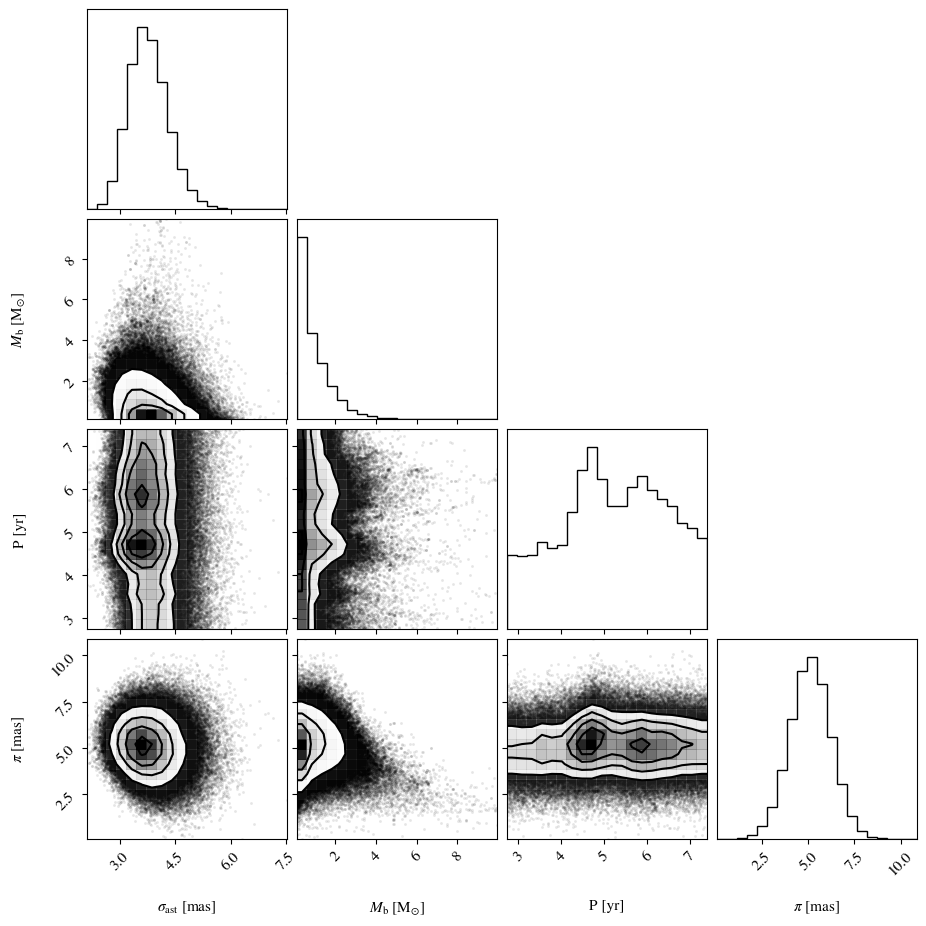

In [18]:
# show jitter/m1 correlation
import corner

sigma_ast = beetle_results.post[:, -1]

to_plot = np.array(
    [
        sigma_ast,
        beetle_results.post[:, beetle_results.system.param_idx["m1"]],
        beetle_results.post[:, beetle_results.system.param_idx["per1"]],
        beetle_results.post[:, beetle_results.system.param_idx["plx"]],
    ],
)
corner.corner(
    to_plot.T,
    labels=[
        "$\sigma_{\\mathrm{{ast}}}$ [mas]",
        "$M_{{\\mathrm{{b}}}}$ [M$_{\odot}$]",
        "P [yr]",
        "$\pi$ [mas]",
    ],
)
plt.savefig(f"{savedir}/jitter_mass.pdf", dpi=250)

<>:63: SyntaxWarning: invalid escape sequence '\p'
<>:63: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_30207/112800249.py:63: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("$\pi$ [mas]")
/tmp/ipykernel_30207/112800249.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  topax.set_xticklabels(np.round(dist_xtick_labels, decimals=1))


[5.48517526 5.8360807  6.18643618]


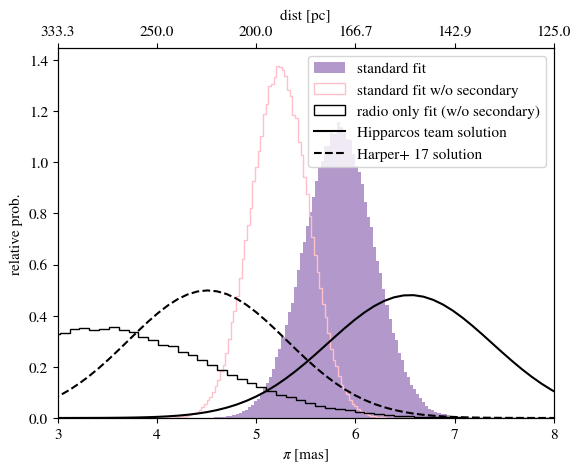

In [10]:
# compare distance for two different fits

# fits to compare
run1A = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_burn100_total25000000"
run1B = "planetFalse_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_burn100_total25000000"
run3B = "planetFalse_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosFalse_burn100_total25000000"

results_1B = results.Results()
results_1B.load_results("results/{}.hdf5".format(run1B))

results_1A = results.Results()
results_1A.load_results("results/{}.hdf5".format(run1A))


results_3B = results.Results()
results_3B.load_results("results/{}.hdf5".format(run3B))


plt.figure()
hts, bins, _ = plt.hist(
    results_1A.post[:, beetle_results.system.param_idx["plx"]],
    bins=100,
    label="standard fit",
    density=True,
    color="rebeccapurple",
    alpha=0.5,
)
hts, bins, _ = plt.hist(
    results_1B.post[:, beetle_results.system.param_idx["plx"]],
    bins=100,
    label="standard fit w/o secondary",
    density=True,
    color="pink",
    histtype="step",
)
hts, bins, _ = plt.hist(
    results_3B.post[:, beetle_results.system.param_idx["plx"]],
    bins=100,
    label="radio only fit (w/o secondary)",
    density=True,
    color="k",
    histtype="step",
)

# overplot Hipparcos team solution
plt.plot(
    bins,
    norm.pdf(bins, 6.55, 0.83),
    label="Hipparcos team solution",
    color="k",
)
plt.plot(
    bins,
    norm.pdf(bins, 4.51, 0.80),
    label="Harper+ 17 solution",
    color="k",
    ls="--",
)


plt.legend()
plt.xlim(3, 8)
plt.xlabel("$\pi$ [mas]")
plt.ylabel("relative prob.")

dist_xtick_labels = 1e3 / plt.xticks()[0]

ax = plt.gca()
topax = ax.twiny()
topax.set_xticklabels(np.round(dist_xtick_labels, decimals=1))
topax.set_xlabel("dist [pc]")


# topax.set_xticklabels(1 / np.array())


plt.savefig("plots/plx_compare.pdf", dpi=250)

plx_quantiles = np.quantile(
    beetle_results.post[:, beetle_results.system.param_idx["plx"]], [0.16, 0.5, 0.84]
)
print(plx_quantiles)

<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:104: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_30207/2936533393.py:103: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel("$\mu_{\\alpha^{*}}$  [mas/yr]")
/tmp/ipykernel_30207/2936533393.py:104: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("$\mu_{\\delta}$ [mas/yr]")


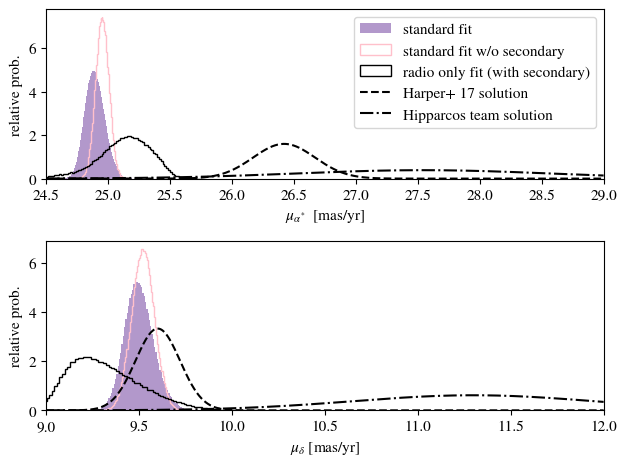

In [9]:
# compare proper motion for three different fits

# fits to compare
run1A = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_burn100_total25000000"
run1B = "planetFalse_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosTrue_burn100_total25000000"
run3A = "planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosFalse_burn100_total25000000"


results_1B = results.Results()
results_1B.load_results("results/{}.hdf5".format(run1B))

results_1A = results.Results()
results_1A.load_results("results/{}.hdf5".format(run1A))

results_3 = results.Results()
results_3.load_results("results/{}.hdf5".format(run3A))


fig, ax = plt.subplots(2, 1)
hts, bins, _ = ax[0].hist(
    results_1A.post[:, beetle_results.system.param_idx["pm_ra"]],
    bins=100,
    label="standard fit",
    density=True,
    color="rebeccapurple",
    alpha=0.5,
)
hts, bins, _ = ax[0].hist(
    results_1B.post[:, beetle_results.system.param_idx["pm_ra"]],
    bins=100,
    label="standard fit w/o secondary",
    density=True,
    color="pink",
    histtype="step",
)
hts, bins, _ = ax[0].hist(
    results_3.post[:, beetle_results.system.param_idx["pm_ra"]],
    bins=100,
    label="radio only fit (with secondary)",
    density=True,
    color="k",
    histtype="step",
)
ra_bins2plot = np.linspace(24.5, 29, int(1e3))
ax[0].plot(
    ra_bins2plot,
    norm.pdf(ra_bins2plot, 26.42, 0.25),
    label="Harper+ 17 solution",
    color="k",
    ls="--",
)
ax[0].plot(
    ra_bins2plot,
    norm.pdf(ra_bins2plot, 27.54, 1.03),
    label="Hipparcos team solution",
    color="k",
    ls="-.",
)
ax[0].legend()

hts, bins, _ = ax[1].hist(
    results_1A.post[:, beetle_results.system.param_idx["pm_dec"]],
    bins=100,
    # label="standard fit",
    density=True,
    color="rebeccapurple",
    alpha=0.5,
)
hts, bins, _ = ax[1].hist(
    results_1B.post[:, beetle_results.system.param_idx["pm_dec"]],
    bins=100,
    # label="standard fit w/o secondary",
    density=True,
    color="pink",
    histtype="step",
)
hts, bins, _ = ax[1].hist(
    results_3.post[:, beetle_results.system.param_idx["pm_dec"]],
    bins=100,
    # label="radio only fit (with secondary)",
    density=True,
    color="k",
    histtype="step",
)
dec_bins2plot = np.linspace(9, 12, int(1e3))
ax[1].plot(
    dec_bins2plot,
    norm.pdf(dec_bins2plot, 9.60, 0.12),
    # label="Harper+ 17 solution",
    color="k",
    ls="--",
)
ax[1].plot(
    dec_bins2plot,
    norm.pdf(dec_bins2plot, 11.30, 0.65),
    # label="Hipparcos team solution",
    color="k",
    ls="-.",
)

ax[0].set_xlim(24.5, 29)
ax[1].set_xlim(9, 12)
ax[0].set_xlabel("$\mu_{\\alpha^{*}}$  [mas/yr]")
ax[1].set_xlabel("$\mu_{\\delta}$ [mas/yr]")

for a in ax:
    a.set_ylabel("relative prob.")
plt.tight_layout()
plt.savefig("plots/pm_compare.pdf", dpi=250)

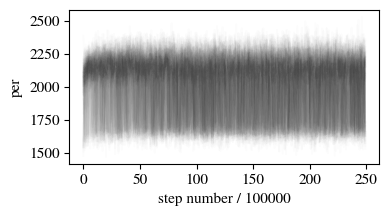

In [46]:
# make MCMC convergence plots
params = {"per1": "per"}
for param in params.keys():
    chn = beetle_results.post[:, beetle_results.system.param_idx[param]] * 365.25

    num_walkers = 1000
    thin = 100
    n_steps = len(chn) // num_walkers
    chn = chn.reshape((num_walkers, n_steps))

    walkers_to_plot = np.random.choice(num_walkers, size=100, replace=False)
    plt.figure(figsize=(4, 2))
    chop_after = 0
    for w in walkers_to_plot:
        plt.plot(chn[w, :][chop_after:], color="k", alpha=0.01)
    plt.xlabel("step number / {}".format(thin * num_walkers))
    plt.ylabel(params[param])
    plt.savefig(
        "{}/per_chains.png".format(savedir),
        dpi=250,
    )

Compare the PAN of the orbit with the star's rotation axis:

<>:46: SyntaxWarning: invalid escape sequence '\O'
<>:46: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_30207/319259812.py:46: SyntaxWarning: invalid escape sequence '\O'
  ax[1].set_xlabel("$\Omega$ [deg]")


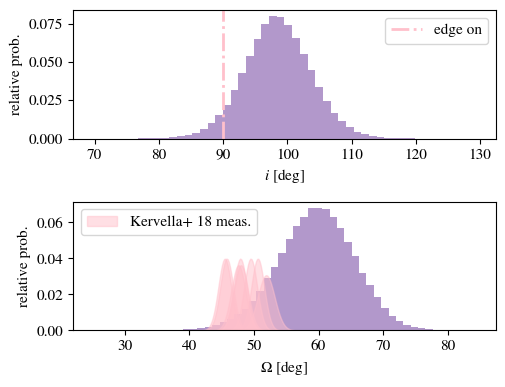

In [6]:
from scipy.stats import norm

"""
Ref for PAN of Betelgeuse:
https://www.aanda.org/articles/aa/full_html/2018/01/aa31761-17/T4.html
"""

beetle_rot_pan = [
    (48.0, 1.1),
    (47.6, 1.1),
    (49.5, 1.0),
    (47.9, 1.0),
    (51.9, 1.3),
    (50.6, 1.0),
    (45.5, 1.0),
    (45.8, 1.0),
]

inc_post = results_1A.post[:, beetle_results.system.param_idx["inc1"]]
pan_post = results_1A.post[:, beetle_results.system.param_idx["pan1"]]

fig, ax = plt.subplots(2, 1, figsize=(5, 4))
ax[0].hist(
    np.degrees(inc_post), bins=50, color="rebeccapurple", density=True, alpha=0.5
)
ax[0].axvline(90, color="pink", ls="-.", label="edge on", lw=2)
ax[0].legend()
ax[1].hist(
    np.degrees(pan_post), bins=50, color="rebeccapurple", alpha=0.5, density=True
)

xs = np.linspace(25, 60, 200)
for i, (pan_est, pan_unc) in enumerate(beetle_rot_pan):
    gaussian_pdf = norm(pan_est, pan_unc).pdf(xs)
    ax[1].fill_between(
        xs,
        gaussian_pdf / 10,
        np.zeros_like(xs),
        color="pink",
        alpha=0.5,
        label="Kervella+ 18 meas.",
    )
    if i == 0:
        ax[1].legend()
ax[0].set_xlabel("$i$ [deg]")
ax[1].set_xlabel("$\Omega$ [deg]")
plt.tight_layout()

for a in ax:
    a.set_ylabel("relative prob.")
plt.savefig("{}/mutual_inc.pdf".format(savedir), dpi=250)

/data/sblunt/miniconda3/envs/python3.12/lib/python3.12/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:134: RuntimeWarning: invalid value encountered in divide
  power /= YY


Maximum of the window function occurs at 3500.00 d.
315.0


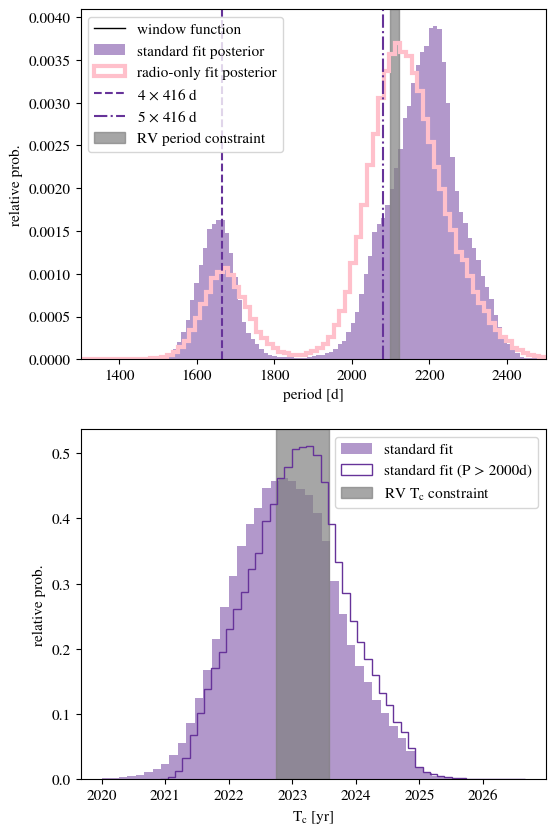

In [11]:
from astropy.timeseries import LombScargle

per_post = beetle_results.post[:, beetle_results.param_idx["per1"]] * 365.25


# total length of dataset
data_len = np.max(beetle_results.system.data_table["epoch"]) - np.min(
    beetle_results.system.data_table["epoch"]
)

# plot the window function
fig, axes = plt.subplots(2, 1, figsize=(6, 10))
plt.sca(axes[0])
ax = axes[0]
radio_epochs = beetle_results.system.data_table["epoch"]
hipparcos_epochs = beetle_results.system.hipparcos_IAD.epochs_mjd
all_epochs = np.sort(np.unique(np.concatenate([radio_epochs, hipparcos_epochs])))


myls = LombScargle(all_epochs, np.ones_like(all_epochs))
freq, power = myls.autopower(
    minimum_frequency=1 / 3500.0,
    maximum_frequency=1 / 1000.0,
    samples_per_peak=3000,
)

plt.plot(1 / freq, power / 8e2, color="k", lw=1, label="window function")
# plt.plot(freq - 0.00007, power * 5000, color="green")
plt.hist(
    per_post,
    alpha=0.5,
    density=True,
    bins=100,
    label="standard fit posterior",
    color="rebeccapurple",
)
print(
    "Maximum of the window function occurs at {:.2f} d.".format(
        1 / freq[np.argmax(power)]
    )
)

results_3A = results.Results()
results_3A.load_results(
    "results/planetTrue_dvdFalse_renormHIPFalse_fitradioTrue_fithipparcosFalse_burn100_total25000000.hdf5"
)
per_post_3A = results_3A.post[:, beetle_results.param_idx["per1"]] * 365.25
plt.hist(
    per_post_3A,
    histtype="step",
    density=True,
    bins=100,
    label="radio-only fit posterior",
    color="pink",
    lw=3,
)


# ax.axvline(420 * 3, label="N * 420d", ls="--", color="red")
ax.axvline(416 * 4, ls="--", color="rebeccapurple", label="4 $\\times$ 416 d")
ax.axvline(416 * 5, ls="-.", color="rebeccapurple", label="5 $\\times$ 416 d")
ax.axvspan(
    2110.4 - 11,
    2110.4 + 11,
    color="grey",
    label="RV period constraint",
    alpha=0.7,
)
# ax.axvline(180, ls="--", color="red")
# ax.axvline(420 * 5, ls="--", color="red")
# ax.axvline(420 * 6, ls="--", color="red")
# ax.axvline(420 * 7, ls="--", color="red")
# ax.axvline(420 * 8, ls="--", color="red")
plt.legend()
plt.xlim(1300, 2500)
plt.xlabel("period [d]")
plt.ylabel("relative prob.")

tP_post = tau_to_tp(
    beetle_results.post[:, beetle_results.param_idx["tau1"]],
    beetle_results.tau_ref_epoch,
    beetle_results.post[:, beetle_results.param_idx["per1"]],
)
ecc = 0
aop = np.pi
per_post_days = beetle_results.post[:, beetle_results.param_idx["per1"]] * 365.25

# conversion code stolen from radvel
f = np.pi / 2 - aop  # true anomaly during transit
ee = 2 * np.arctan(np.tan(f / 2) * np.sqrt((1 - ecc) / (1 + ecc)))  # eccentric anomaly

tc_post = tP_post + per_post_days / (2 * np.pi) * (
    ee - ecc * np.sin(ee)
)  # time of conjunction


after_date = after_date = Time(2020, format="decimalyear").mjd
num_periods = (after_date - tc_post) / per_post_days
num_periods = np.ceil(num_periods).astype(int)
tc_post += num_periods * per_post_days

axes[1].hist(
    Time(tc_post, format="mjd").decimalyear,
    color="rebeccapurple",
    alpha=0.5,
    bins=50,
    density=True,
    label="standard fit",
)
axes[1].hist(
    Time(tc_post[per_post_days > 2000], format="mjd").decimalyear,
    color="rebeccapurple",
    histtype="step",
    bins=50,
    density=True,
    label="standard fit (P > 2000d)",
)
axes[1].set_ylabel("relative prob.")
axes[1].set_xlabel("T$_{\\mathrm{{c}}}$ [yr]")
axes[1].axvspan(
    2023.15 - 0.4,
    2023.15 + 0.43,
    color="grey",
    label="RV T$_{\\mathrm{{c}}}$ constraint",
    alpha=0.7,
)
axes[1].legend()

plt.savefig("{}/period_window.pdf".format(savedir), dpi=250)


def print_alias(samp_per, actual_per):
    alias_per = 1 / (1 / samp_per - 1 / actual_per)
    print(alias_per)


print_alias(180, 420.0)